In [106]:
import numpy as np
import matplotlib.pyplot as plt
import neurenorm
from scipy.optimize import curve_fit

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (6/1.5,7/1.5)
plt.rcParams["figure.dpi"] = 300

In [2]:
data = neurenorm.load_data('data.tif')

In [3]:
def random_clustering_step(data, norm=neurenorm.normalize_data):
    """Performs one step of random clustering and return the coarse-grained array."""
    
    arr_out = np.zeros((len(data)//2, len(data[0])))
    indices = [i for i in range(len(data))]
    
    for pair in range(len(data)//2):
        ind_neuron1 = indices.pop(np.random.randint(0, len(indices)))
        ind_neuron2 = indices.pop(np.random.randint(0, len(indices)))
        
        arr_out[pair] = data[ind_neuron1] + data[ind_neuron2]
        
    return norm(arr_out)


def perform_random_clustering(data, steps):
    """Similar to the perform_renormalization function; these two could probably be merged by adding an additional
    steptype parameter."""
    
    newdata = [data]
    
    for _ in range(steps):
        newdata.append(random_clustering_step(newdata[-1]))
        
    return newdata
    

In [4]:
randclust_data = perform_random_clustering(data, 8)

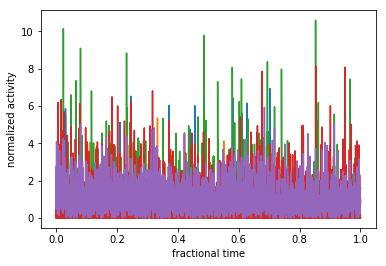

In [5]:
x = np.linspace(0, 1, len(data[0]))

for subdata in randclust_data[::2]:
    plt.plot(x, subdata[0])
    
plt.xlabel('fractional time')
plt.ylabel('normalized activity')
plt.show()

In [11]:
len(randclust_data)

9

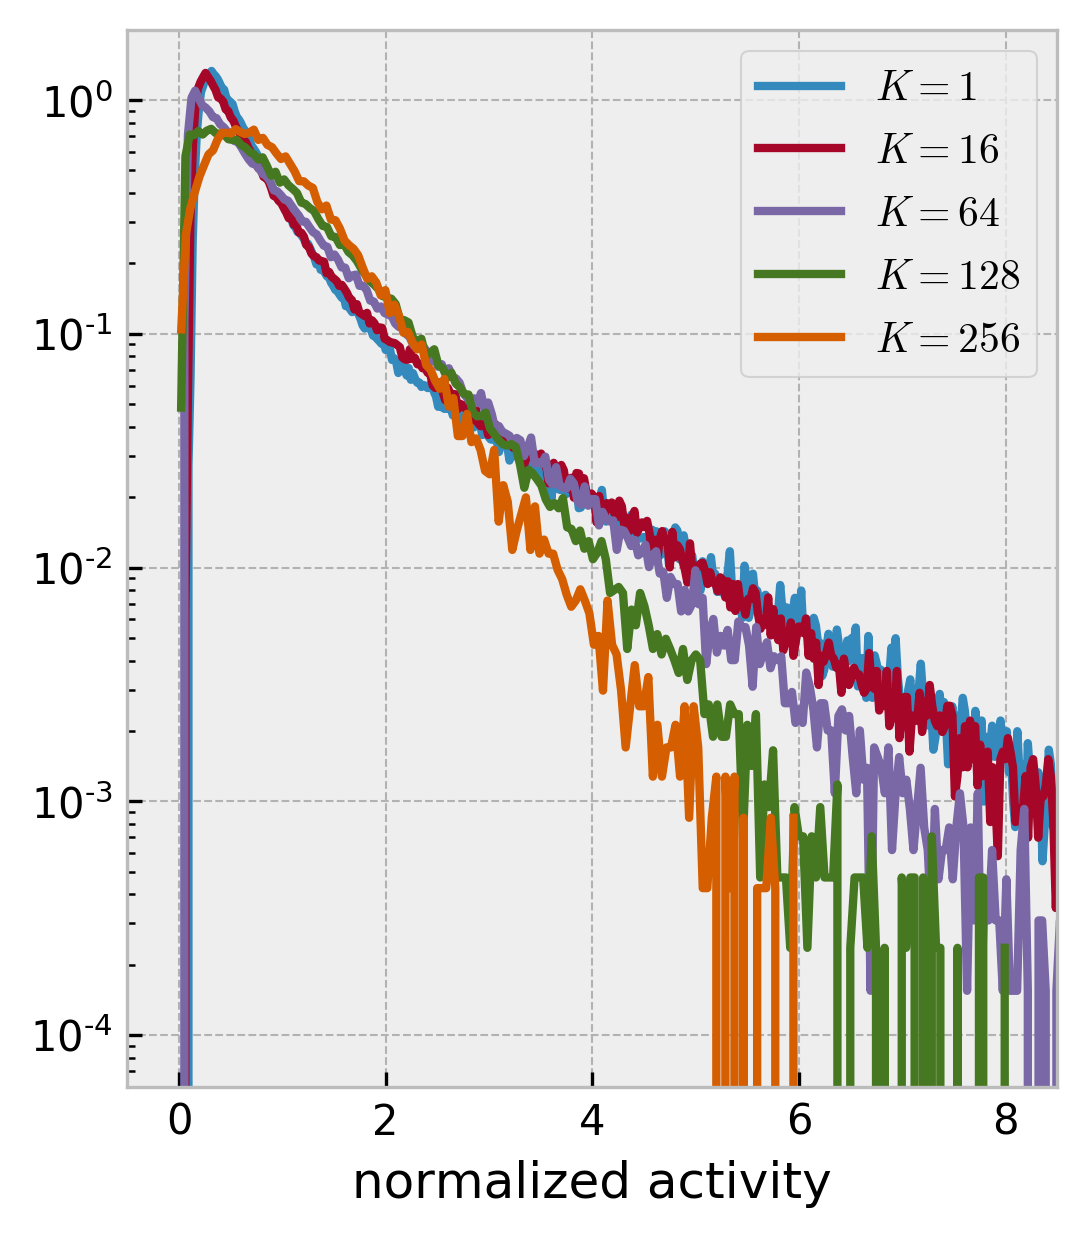

In [120]:
for i in [0, 4, 6, 7, 8]:
    x, y = neurenorm.make_histogram(randclust_data[i])
    plt.yscale('log')
    plt.xlim(-0.5,8.5)
    plt.plot(x, y, label="$K={}$".format(2**i))
# plt.ylabel('probability density')
plt.xlabel('normalized activity')
plt.legend(loc=0)
plt.ylim(0.6*10**-4, 2)
# plt.title('Prob density after various steps')
plt.show()

In [7]:
p_zero_rc, p_errs_rc, cluster_sizes = neurenorm.compute_p_trajectory(randclust_data)

def neg_log(data):
    return -np.log(data)

In [76]:
# Fitting the exponents to the P_0 curve

f = lambda x, beta, a: a * np.power(x, beta)
f2 = lambda x, a: a * x

popt, perr = curve_fit(f, cluster_sizes, neg_log(p_zero_rc))
popt2, perr2 = curve_fit(f2, cluster_sizes, neg_log(p_zero_rc))

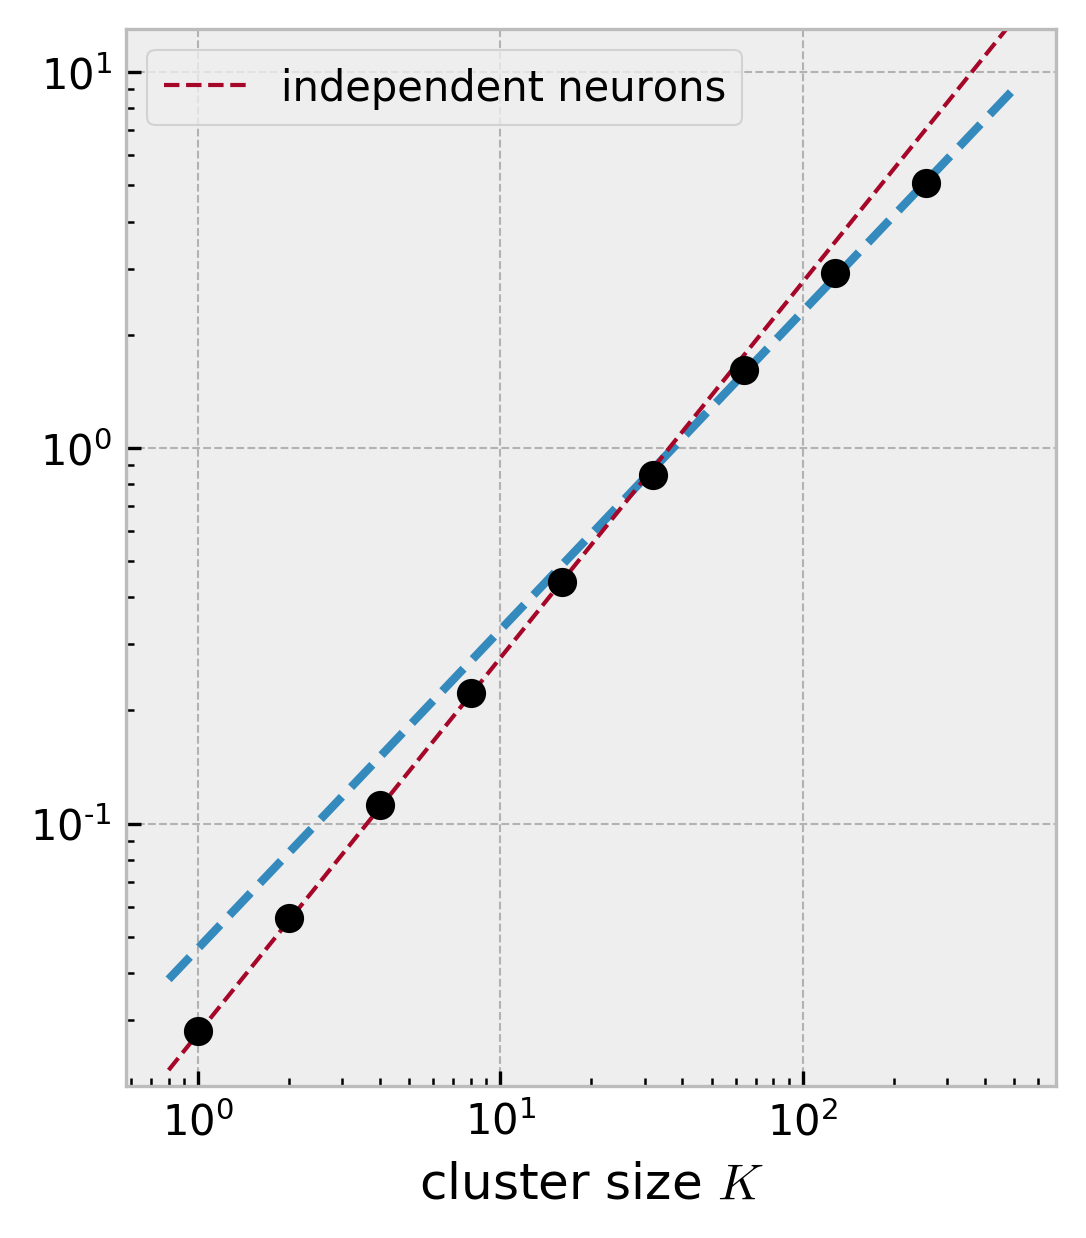

In [122]:
errs_rc = neg_log(p_zero_rc + p_errs_rc / 2) - neg_log(p_zero_rc - p_errs_rc / 2)
x = np.linspace(0.8, 500, 100)
plt.plot(x, f(x, *popt), '--')
plt.plot(x, f(x, 1.0, 0.0276), '--', linewidth=1, label="independent neurons")
plt.errorbar(cluster_sizes, neg_log(p_zero_rc), fmt='ko')
plt.yscale('log')
plt.xscale('log')
plt.ylim(.02, 13)
plt.xlabel('cluster size $K$')
# plt.ylabel('$-\ln(P_0)$')
plt.legend()
plt.show()


In [105]:
popt

array([0.84754913, 0.0465298 ])

In [45]:
pop2

array([0.02074826])